### import dataset e librerie

In [1]:
! pip install contractions

     |████████████████████████████████| 245kB 4.3MB/s 
     |████████████████████████████████| 317kB 54.0MB/s 
  Created wheel for pyahocorasick: filename=pyahocorasick-1.4.0-cp36-cp36m-linux_x86_64.whl size=81700 sha256=95fd645d4b4ba20f94f330e6a43ec6d9acb8e970a8efb133217b9d10dcab56b9
  Stored in directory: /root/.cache/pip/wheels/0a/90/61/87a55f5b459792fbb2b7ba6b31721b06ff5cf6bde541b40994
Successfully built pyahocorasick


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
import gzip
import json
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
import unicodedata
import matplotlib.pyplot as plt
import seaborn as sns
#import tensorflow
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from keras.models import Sequential
import contractions
import re
import inflect
from keras.layers import Dense, Dropout,Embedding, LSTM, GRU,CuDNNGRU,CuDNNLSTM
from keras.regularizers import l1_l2
from sklearn.preprocessing import StandardScaler
from keras.preprocessing.sequence import pad_sequences

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


Using TensorFlow backend.


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
def parse(path):
    g = gzip.open(path, 'rb')
    for l in g:
        yield json.loads(l)

def getDF(path):
    i = 0
    df = {}
    for d in parse(path):
        df[i] = d
        i += 1
    return pd.DataFrame.from_dict(df, orient='index')

In [0]:
df_pet = getDF("/content/drive/My Drive/Text Mining/Text Mining and Search - Final Project (Borroni, Corvaglia, Giugliano)/Codice/Pet_Supplies_5.json.gz")

In [0]:
df_pet=pd.DataFrame(df_pet)

In [0]:
df_pet.head(10)

In [0]:
df=df_pet[["overall","reviewText"]]

In [0]:
df.dropna(inplace=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
df

,overall,reviewText
0,3.0,I purchased this cd for my Pocket Parrot. It h...
1,3.0,"Maybe it's just my Amazon parrot, but she's no..."
2,5.0,I bought this to help me teach my blue quaker ...
3,3.0,Bird showed no interest in it....
4,2.0,Didn't do a thing for my African Grey! He hate...
...,...,...
2098320,4.0,"It did no harm, but hard to see any improvemen..."
2098321,4.0,These are not rounded. I bought them for my li...
2098322,5.0,My destroyer French Bulldog was not able to de...
2098323,4.0,"This is one of my dog's favorite toys, but all..."


### analisi esplorativa e preprocessing




In [0]:
import seaborn as sns


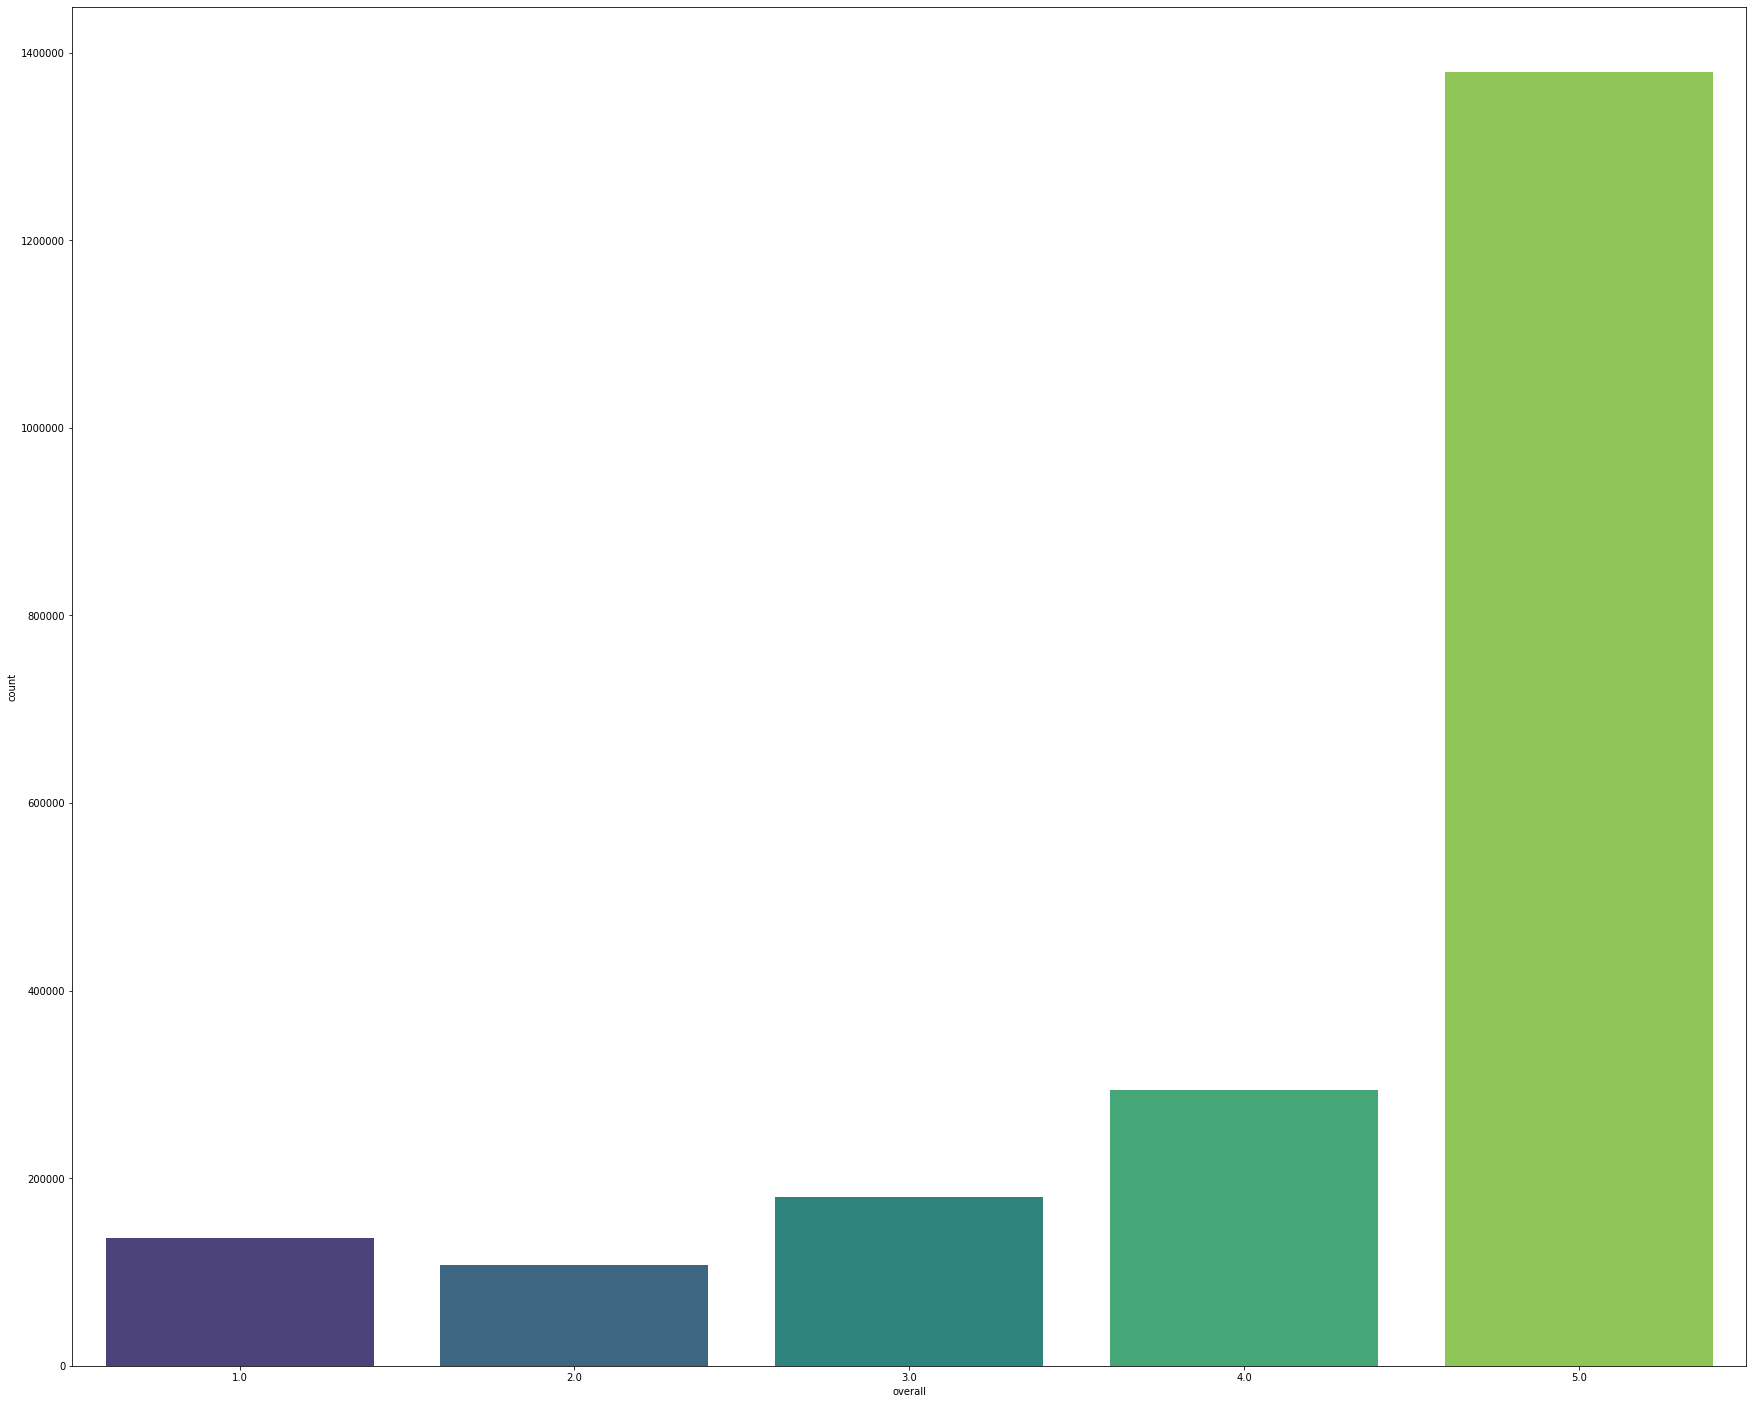

In [0]:
plt.figure(figsize=(30,25))
sns.countplot(df.overall,palette="viridis")
plt.savefig("plot.png",transparent=True)

In [0]:
df1=df[df["overall"]==1].head(50000)
df2=df[df["overall"]==2].head(50000)
df3=df[df["overall"]==3]
df4=df[df["overall"]==4].head(50000)
df5=df[df["overall"]==5].head(50000)

In [0]:
df_f=pd.concat([df1, df2, df4,df5])

In [0]:
df_f = df_f.replace(to_replace={1.0:0,
                         2.0:0,
                         4.0:1,
                         5.0:1,
                         })

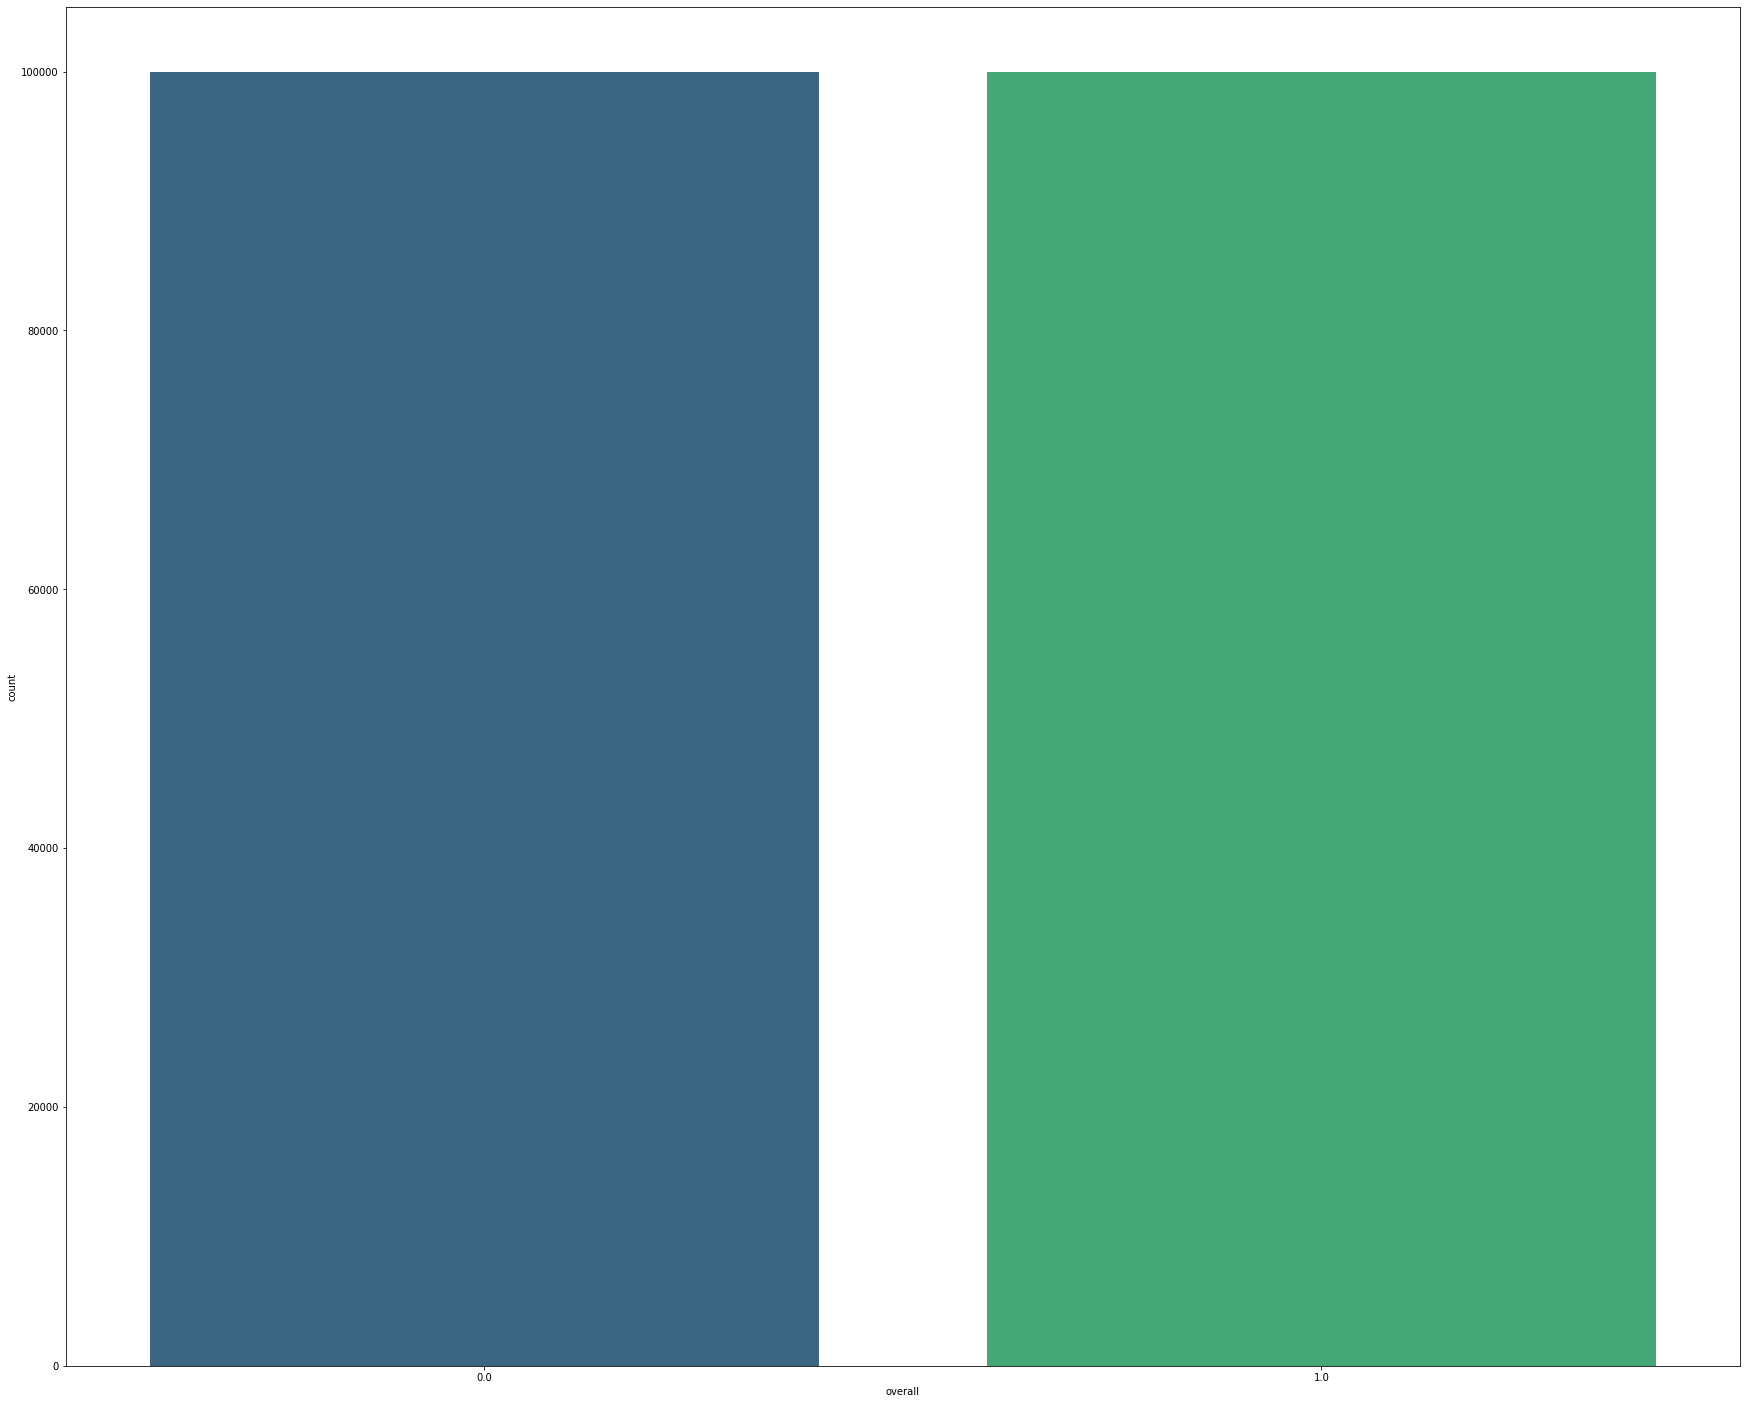

In [0]:
plt.figure(figsize=(30,25))
sns.countplot(df_f.overall,palette="viridis")
plt.savefig("plot.png",transparent=True)

In [0]:
df_f.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200000 entries, 9 to 71363
Data columns (total 2 columns):
overall       200000 non-null float64
reviewText    200000 non-null object
dtypes: float64(1), object(1)
memory usage: 9.6+ MB


In [0]:
df_f['Reviews_length'] = df_f['reviewText'].str.len()

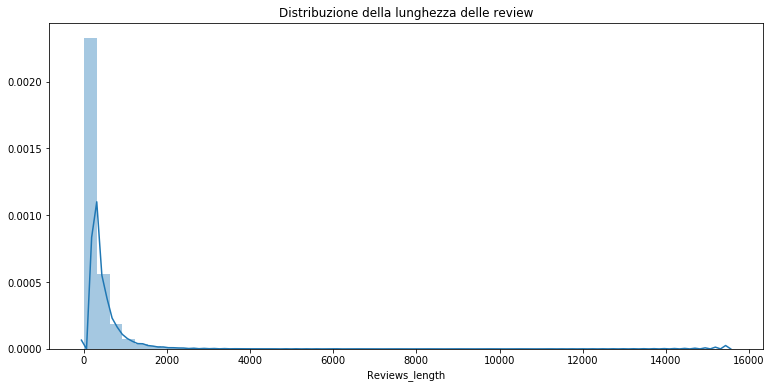

In [0]:
plt.figure(figsize=(12.8,6))
sns.distplot(df_f['Reviews_length']).set_title('Distribuzione della lunghezza delle review');

In [0]:
df_f["reviewText"]=[contractions.fix(elem.lower()) for elem in df_f["reviewText"]]

In [0]:
df_f["reviewText"]=[re.sub(r'[^\w\s]', '', elem) for elem in df_f["reviewText"]]

In [0]:
def get_wordnet_pos(word):
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

In [0]:
def tokenization_lemmatization(text):
    return [lemmatizer.lemmatize(w,get_wordnet_pos(w)) for w in w_tokenizer.tokenize(text)]

In [0]:
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

#df.reviewText = df.reviewText.apply(tokenization_lemmatization_v)
df_f.reviewText = df_f.reviewText.apply(tokenization_lemmatization)

In [0]:
def remove_stopwords(x):
    review = " "
    for w in x: 
        if w not in stop_words:
            review = review + " " + w
    return (review)

In [0]:
stop_words = set(stopwords.words('english')) 
df_f.reviewText = df_f.reviewText.apply(remove_stopwords) 

### dataset completo

In [0]:
import joblib
#joblib.dump(df_f, "/content/drive/My Drive/Text Mining/df_lemma.joblib")
my_dump = pd.read_csv('/content/drive/My Drive/Text Mining/Text Mining and Search - Final Project (Borroni, Corvaglia, Giugliano)/Codice/new_df.csv')

In [12]:
my_dump[my_dump.overall==1.0]

,Unnamed: 0,overall,reviewText,sentiment
100000,5,1.0,like cockatiel sure listens far speak,1
100001,11,1.0,fast service parrot still say anything new c...,1
100002,13,1.0,really like cd choose repeat whatever phrase...,1
100003,17,1.0,finish reading book 2 day book cover pretty ...,0
100004,22,1.0,bought triliogy test dvd appear volume 2 wel...,2
...,...,...,...,...
199995,71359,1.0,perfect everything need add water pond,1
199996,71360,1.0,use rain water change,0
199997,71361,1.0,good stuff,1
199998,71362,1.0,much well economical maintenance tetra easy ...,3


In [0]:
X_train, X_test, y_train, y_test = train_test_split(my_dump['reviewText'],#"sentiment"]], 
                                                    my_dump['overall'], 
                                                    test_size=0.15, 
                                                    random_state=8)

In [0]:
X_test

154651                                                 love
101104                                    good healthy food
149250      thing would make well would less hole arm fe...
26677       damn thing stay put adjust fit dog get free ...
17041       dreadful smell like soap beardie would touch...
                                ...                        
24567       originally give good rating work great exact...
5981                                                  short
12085       would like send back dificult use dog pain t...
4264        thrill like mesh flimsy way get put together...
175003      always use instant ocean sea salt 160gallon ...
Name: reviewText, Length: 30000, dtype: object

In [0]:
#scaler = StandardScaler()
#sent=np.array(X_train["sentiment"]).reshape(-1, 1)
#sent=scaler.fit_transform(sent)

In [0]:
#len(sent)

### tf-idf

In [0]:
ngram_range = (1,2)
min_df = 10
max_df = 1.
max_features = 1000

In [0]:
tfidf = TfidfVectorizer(encoding='utf-8',
                        ngram_range=ngram_range,
                        stop_words=None,
                        lowercase=False,
                        max_df=max_df,
                        min_df=min_df,
                        max_features=max_features,
                        norm='l2',
                        sublinear_tf=True)

In [0]:
features_train = tfidf.fit_transform(X_train).toarray()##
labels_train = y_train
#print(features_train["reviewText"].shape)

In [0]:
xt=tfidf.fit_transform(X_test).toarray()

In [0]:
#xt=np.concatenate((features_train, sent),axis=1)

In [0]:
#xt.shape

In [0]:
#features_train.shape

### pca

In [0]:
from sklearn.decomposition import PCA

In [0]:
pca = PCA(0.99,svd_solver ='full',random_state=42)

In [0]:
X_train= pca.fit_transform(features_train,labels_train)

In [0]:
features_train

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.11773441, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

### rete neurale di baseline

In [0]:
model = Sequential()
model.add(Dense(1024, input_shape=(features_train.shape[1],), activation = "relu",kernel_regularizer=l1_l2(0.0001,0.0001)))
model.add(Dropout(0.5))
model.add(Dense(512, activation = "relu",kernel_regularizer=l1_l2(0.000075,0.000075)))
model.add(Dropout(0.5))
model.add(Dense(256, activation = "relu",kernel_regularizer=l1_l2(0.000075,0.000075)))
model.add(Dropout(0.5))
model.add(Dense(64, activation = "relu",kernel_regularizer=l1_l2(0.000075,0.0000075)))
model.add(Dropout(0.5))
model.add(Dense(1, activation = 'sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1024)              1025024   
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               524800    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)               

In [0]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [0]:
network_history=model.fit(features_train, labels_train, epochs=100, batch_size=1024, validation_split=0.1)


Train on 153000 samples, validate on 17000 samples
Epoch 1/100



153000/153000 [==============================] - 11s 74us/step - loss: 1.3677 - acc: 0.7518 - val_loss: 0.5442 - val_acc: 0.8210
Epoch 2/100
153000/153000 [==============================] - 1s 10us/step - loss: 0.5430 - acc: 0.8159 - val_loss: 0.5041 - val_acc: 0.8260
Epoch 3/100
153000/153000 [==============================] - 2s 10us/step - loss: 0.5175 - acc: 0.8211 - val_loss: 0.4910 - val_acc: 0.8282
Epoch 4/100
153000/153000 [==============================] - 2s 10us/step - loss: 0.5064 - acc: 0.8244 - val_loss: 0.4802 - val_acc: 0.8317
Epoch 5/100
153000/153000 [==============================] - 1s 10us/step - loss: 0.5011 - acc: 0.8271 - val_loss: 0.4768 - val_acc: 0.8329
Epoch 6/100
153000/153000 [==============================] - 1s 10us/step - loss: 0.4963 - acc: 0.8284 - val_loss: 0.4729 - val_acc: 0.8327
Epoch 7/100
153000/153000 [==============================] - 1s 10us/step - loss: 0.4927 - acc: 0.8305 - val_loss: 0.4725 - val_acc: 0.8326
Epoch 8/100
153000/153000 [====

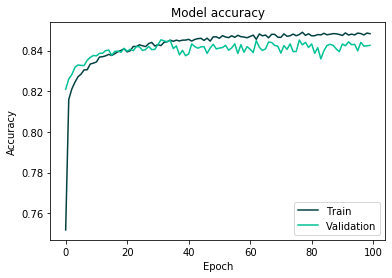

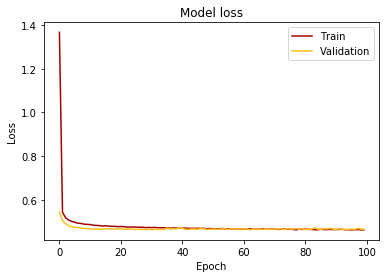

In [0]:
# Plot training & validation accuracy values
plt.plot(network_history.history["acc"], color = "#004041")
plt.plot(network_history.history["val_acc"], color = "#00C196")
plt.title("Model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc = "lower right")
plt.show()

# Plot training & validation loss values
plt.plot(network_history.history["loss"], color = "#A00000")
plt.plot(network_history.history["val_loss"], color = "#FFBF18")
plt.title("Model loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc = "upper right")
plt.show()

In [0]:
predictions = model.predict(xt)

In [0]:
score = model.evaluate(xt, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.1426487400690715
Test accuracy: 0.5383333333333333


In [0]:
predictions

array([[0.24893105],
       [0.54137224],
       [0.03191799],
       ...,
       [0.06732959],
       [0.9330429 ],
       [0.08898377]], dtype=float32)

### sentiment


In [0]:
import nltk
nltk.download('opinion_lexicon')

[nltk_data] Downloading package opinion_lexicon to /root/nltk_data...
[nltk_data]   Package opinion_lexicon is already up-to-date!


True

In [0]:
from nltk.corpus import opinion_lexicon

In [0]:
pos_list=set(opinion_lexicon.positive())
neg_list=set(opinion_lexicon.negative())

In [0]:
from nltk.tokenize import treebank
tokenizer = treebank.TreebankWordTokenizer()

In [0]:
def sentiment(sentence):
  senti=0
  words = [word.lower() for word in tokenizer.tokenize(sentence)]
  for word in words:
    if word in pos_list:
      senti += 1
    elif word in neg_list:
      senti -= 1
  return senti

In [0]:
my_dump['sentiment']=my_dump['reviewText'].apply(sentiment)

In [0]:
a=my_dump[my_dump.overall==0]

In [0]:
len(a[a.sentiment<=0])

61619

In [0]:
b=my_dump[my_dump.overall==1]

In [0]:
len(b[b.sentiment>0])

74776

In [0]:
(61619+74776)/200000

0.681975